<a href="https://colab.research.google.com/github/NathanAmoussou/AMOUSSOU_JEYAKANTHAN/blob/main/Learning_exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

## Dataset
 We consider a simple training dataset where each instance $s$ has two attributes  $(x_1^s, x_2^s)$ and a binary label $label^s\in\{0,1\}$. There are 50 instances in this training dataset.
 $X$ is a matrix of size $50\times2$, $label$ is the vector of labels, of size $50$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_logistic_data ():
    np.random.seed(0)
    x1 =  np.random.rand(50)
    x2 =  np.random.rand(50)
    label = np.array([ 1 if (-1+3*s1<= s2) else 0 for s1, s2 in zip(x1, x2)])

    return np.c_[x1, x2], label
X, label = generate_logistic_data()

def plot_logistic_data(x1, x2, lable):
    for s1, s2, l in zip(x1, x2, label):
        if l == 1:
            plt.plot(s1, s2, 'o', c='green')
        else:
            plt.plot(s1, s2, 'x', c='red')
    plt.ylim([-0.2,1.2])
    plt.xlabel("x1")
    plt.ylabel("x2")
plot_logistic_data(X[:,0], X[:,1], label)

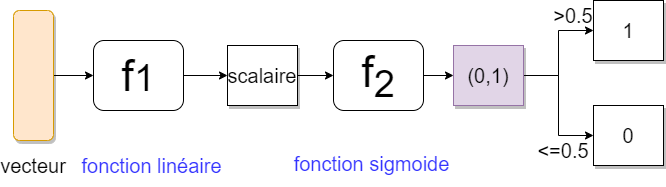

### In the last course, we have coded the prediction function of logistic regression presented above.

### Ex 1: Remind yourself the following prediction function returns what values?

In [ ]:
def prediction(c, X):
    y = c[0]+X@c[1:]
    p = 1/(1+np.exp(-y))
    cat = (p>0.5).astype(int)
    return p, cat

### Ex 2:
Define a function "log_loss" to calculate the loss of logistic regression, given paramters $c\in R^{n+1}$ and the dataset $X\in R^{m\times n}$ with labels $label\in \{0,1\}^{m}$.

Remarque: the formule of log-loss function

$$\sum_{(x^s, y^s)\in S} y^s\times[-log(p^s)] + (1-y^s)\times[-log(1-p^s)]$$

In [ ]:
def log_loss(c, X, label):
    pass

The function  *gradient* below returns the gradient of a model with parameters $c$ in logistic regression. The returned gradient is of size $n$

In [ ]:
def gradient(c, X, label):
    p, _ = prediction(c, X)
    gc0 = -np.sum(label-p)
    gc = -(label-p)@X
    return np.insert(gc,0, gc0)

In [ ]:
import pylab as pl
from IPython import display
import time
def afficher_model(c, X):
    line = -c[0]/c[2] - c[1]/c[2]*X[:,0]
    plt.plot(X[:,0], line, '--')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(2.0)

### Ex 3:
Finalize the following code for training logistic regression with gradient descent


In [ ]:
def RL_GD(X,label,T,eta,interval=50, affichage=True):
    """
    T : le nombre d'itérations
    eta : le taux d'apprentissage
    """
    c = np.random.normal(0, 0.1, X.shape[1]+1)
    if affichage: afficher_model(c,X)

    m = X.shape[0]

    # Code gradient descent algorithm
    for t in range(1,T+1):
        #Step 1: Calculate gradient
        #To fill

        # Step 2: update the parameters
        # To fill

        #Caculate the loss and the prediction
        loss = log_loss(c, X, label)
        _, pred = prediction(c, X)
        acc = 0 # Remove 0 and To fill

        #Afficher le performance du modèle (le perte et la précision de la prédiction)
        if t%interval == 0:
            print(f"Iteration: {t}, Log Loss: {loss:.2f}, Accu: {acc:.2f}")
            if affichage: afficher_model(c,X)

    return c

### Test your code

In [ ]:
plot_logistic_data(X[:,0], X[:,1], label)
RL_GD(X, label, 1000, 0.05)

### Ex 4: advanced exercices

Try to code RMSProp algorithm